In [20]:
# Import packages
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
from scipy.optimize import fminbound
from scipy import interpolate
from quantecon.markov.approximation import rouwenhorst

In [35]:
#### Parameters
gamma = 0.5     # risk aversion
beta = 0.95     # discount factor
delta = 0.05    # depreciation rate of capital
alpha = 0.4     # return to capital

In [36]:
'''
------------------------------------------------------------------------
Create Grid for State Space - Capital    
------------------------------------------------------------------------
kmin      = scalar, lower bound of capital grid
kmax      = scalar, upper bound of capital grid 
size_k    = integer, number of grid points in capital state space
k_grid    = vector, size_k x 1 vector of capital grid points 
------------------------------------------------------------------------
'''
kmin   = 5 # Note that the steady state of k is 11.65 so we create grid around that
kmax   = 15 
size_k = 10  # Number of grid points for k
k_grid = np.linspace(kmin, kmax, size_k)
'''
------------------------------------------------------------------------
Create Grid for State Space - Shocks to Production    
------------------------------------------------------------------------
kmin      = scalar, lower bound of capital grid
kmax      = scalar, upper bound of capital grid 
size_k    = integer, number of grid points in capital state space
k_grid    = vector, size_k x 1 vector of capital grid points 
------------------------------------------------------------------------
'''
size_z = 5
sigZ = 0.2
muZ = 0
dist = rouwenhorst(size_z, muZ, sigZ, rho=0)
ln_z_grid, pi_t = dist.state_values, dist.P
z_grid = np.exp(ln_z_grid)
pi = np.transpose(pi_t)

In [42]:
def production(k,z=1):
    ''' Production function of capital and a random shock'''
    y = z * (k ** alpha)
    return y

@np.vectorize
def capital_transition(k_old,investment):
    ''' Transition equation of capital, takes in old capital and investment '''
    k_new = ((1 - delta) * k_old) + investment
    return k_new

In [53]:
'''
------------------------------------------------------------------------------
Create grid of current utility values    
------------------------------------------------------------------------------
C        = matrix, current consumption (c=z_tk_t^alpha - k_t+1)
U        = matrix, current period utility value for all possible
           choices of w and w' (rows are w, columns w')
------------------------------------------------------------------------------
'''

C = np.zeros((size_k, size_k, size_z)) 
C.size
for i, k in enumerate(k_grid): # loop over k
    for j, k_prime in enumerate(k_grid): # loop over k'
        for t, z in enumerate(k_grid): # loop over z
            # C[i, j, t] = production(k,z) - k_prime # note that if w'>w, consumption negative
# replace 0 and negative consumption with a tiny value 
# This is a way to impose non-negativity on cons

# # C[C<=0] = 1e-8
# if gamma == 1:
#     U = np.log(C)
# else:
#     U = (C ** (1 - gamma)) / (1 - gamma)
# U[C<0] = -9999999


SyntaxError: unexpected EOF while parsing (<ipython-input-53-c468754f5ae2>, line 25)

In [31]:
'''
------------------------------------------------------------------------
Value Function Iteration    
------------------------------------------------------------------------
VFtol     = scalar, tolerance required for value function to converge
VFdist    = scalar, distance between last two value functions
VFmaxiter = integer, maximum number of iterations for value function
V         = vector, the value functions at each iteration
Vmat      = matrix, the value for each possible combination of w and w'
Vstore    = matrix, stores V at each iteration 
VFiter    = integer, current iteration number
TV        = vector, the value function after applying the Bellman operator
PF        = vector, indicies of choices of w' for all w 
VF        = vector, the "true" value function
------------------------------------------------------------------------
'''

VFtol = 1e-6
VFdist = 7.0
VFmaxiter = 5000
V = np.zeros((size_k, size_z)) # initial guess at value function
Vmat = np.zeros((size_k, size_k, size_z))
VFiter = 1
while VFdist > VFtol and VFiter < VFmaxiter:
    for i in range(size_k): # loop over w
        for j in range(size_k): # loop over w'
            for k in range(size_z): # loop over z
                EV = 0
                for ii in range(size_z):
                    EV += pi[k, ii]*V[j, ii]
                Vmat[i, j, k] = U[i, j, k] + beta * EV
    TV = Vmat.max(1)
    PF = np.argmax(Vmat, axis=1)
    VFdist = (np.absolute(V - TV)).max()  # check distance
    print("Iteration, ",VFiter, "distance: ", VFdist)
    V = TV
    VFiter += 1

if VFiter < VFmaxiter:
    print('Value function converged after this many iterations:', VFiter)
else:
    print('Value function did not converge')


VF = V # solution to the functional equation

Iteration,  1 distance:  7.3911065799097075
Iteration,  2 distance:  9.926942528925622
Iteration,  3 distance:  7.007879552309026
Iteration,  4 distance:  6.535990204353819
Iteration,  5 distance:  6.343261885748177
Iteration,  6 distance:  5.904090733859185
Iteration,  7 distance:  5.589073374172472
Iteration,  8 distance:  5.307353869763745
Iteration,  9 distance:  5.042880205421241
Iteration,  10 distance:  4.78988285791165
Iteration,  11 distance:  4.550284793718383
Iteration,  12 distance:  4.322742401835278
Iteration,  13 distance:  4.106618154534914
Iteration,  14 distance:  3.901277132791435
Iteration,  15 distance:  3.7062122988587163
Iteration,  16 distance:  3.5209014576415143
Iteration,  17 distance:  3.34485645893767
Iteration,  18 distance:  3.177613525647658
Iteration,  19 distance:  3.018732841155199
Iteration,  20 distance:  2.8677961981894384
Iteration,  21 distance:  2.7244063878383145
Iteration,  22 distance:  2.5881860673343198
Iteration,  23 distance:  2.458776763

Iteration,  210 distance:  0.0001678932705999614
Iteration,  211 distance:  0.00015949860704722596
Iteration,  212 distance:  0.0001515236766920225
Iteration,  213 distance:  0.00014394749285884245
Iteration,  214 distance:  0.00013675011823011118
Iteration,  215 distance:  0.0001299126123512906
Iteration,  216 distance:  0.00012341698166551396
Iteration,  217 distance:  0.0001172461326177654
Iteration,  218 distance:  0.0001113838260096145
Iteration,  219 distance:  0.00010581463470771268
Iteration,  220 distance:  0.00010052390291548363
Iteration,  221 distance:  9.549770783223721e-05
Iteration,  222 distance:  9.072282242073015e-05
Iteration,  223 distance:  8.618668130111473e-05
Iteration,  224 distance:  8.187734724174334e-05
Iteration,  225 distance:  7.778347989528811e-05
Iteration,  226 distance:  7.389430589910262e-05
Iteration,  227 distance:  7.019959059562098e-05
Iteration,  228 distance:  6.668961106015558e-05
Iteration,  229 distance:  6.335513049293695e-05
Iteration,  23

In [26]:

# Plot optimal consumption rule as a function of capital size# Plot o 
optK = k_grid[PF]
optC = z_grid * k_grid ** (alpha) + (1 - delta) * k_grid - optK
plt.figure()
fig, ax = plt.subplots()
ax.plot(k_grid[:], optC[:][4], label='Consumption')
# Now add the legend with some customizations.
#legend = ax.legend(loc='upper left', shadow=False)
# Set the fontsize
for label in legend.get_texts():
    label.set_fontsize('large')
for label in legend.get_lines():
    label.set_linewidth(1.5)  # the legend line width
plt.xlabel('Size of Capital')
plt.ylabel('Optimal Consumption')
plt.title('Optimal consumption as size of capital')
plt.show()

ValueError: operands could not be broadcast together with shapes (5,) (10,) 

IndexError: index 17 is out of bounds for axis 0 with size 10

<Figure size 432x288 with 0 Axes>

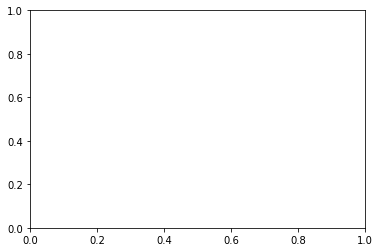

In [19]:
# Plot optimal consumption rule as a function of capital next period
plt.figure()
fig, ax = plt.subplots()
ax.plot(k_grid[:], optK[:][17], label='Consumption')
# Now add the legend with some customizations.
#legend = ax.legend(loc='upper left', shadow=False)
# Set the fontsize
for label in legend.get_texts():
    label.set_fontsize('large')
for label in legend.get_lines():
    label.set_linewidth(1.5)  # the legend line width
plt.xlabel('Size of Capital next period')
plt.ylabel('Optimal Consumption')
plt.title('Optimal consumption as size of capital next period')
plt.show()